In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Import co2 data from .txt file, skip first 54 rows and select two columes and add headers
url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
cols = ['Year', 'Month', 'CO2 (parts per million)'] 

df = pd.read_csv(url, header = None, skiprows = 58, delim_whitespace = True, 
                 usecols = [0,1,4], names = cols, parse_dates = [[0,1]], infer_datetime_format = True)
df.head()

,Year_Month,CO2 (parts per million)
0,1958-03-01,314.43
1,1958-04-01,315.16
2,1958-05-01,314.71
3,1958-06-01,315.14
4,1958-07-01,315.18


In [6]:
# Read bottom value
CO2_latest = df.loc[len(df) - 1, 'CO2 (parts per million)']
CO2_latest_date = df.loc[len(df) - 1, 'Year_Month']

In [7]:
# Get Month and Year bottom value for labels and filenames
FileMonthYear = CO2_latest_date.strftime('%y_%m')
MonthYear = CO2_latest_date.strftime('(%m/%y): ')

In [8]:
# Remove dates before 2005
res = df[~(df['Year_Month'] < '2005-01-01')]
res.head()

,Year_Month,CO2 (parts per million)
562,2005-01-01,378.37
563,2005-02-01,379.10
564,2005-03-01,379.45
565,2005-04-01,379.84
566,2005-05-01,379.49


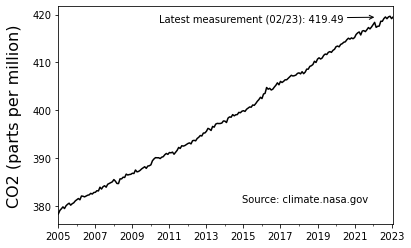

In [9]:
# Plot graph
ax = res.plot(kind='line', x = 'Year_Month', y ='CO2 (parts per million)', fontsize = 10, legend = False, color = 'black')
ax.set_xlabel(None)
ax.set_ylabel("CO2 (parts per million)", fontsize = 16, labelpad = 10)

#ax.annotate('Lastest measurement - 415.88 ppm', xycoords='axes fraction', xy=(0.8,0.9), 
     #       xytext=(0.3,0.9), arrowprops={'arrowstyle': '->'}, va='right')

ax.annotate('Latest measurement ' + MonthYear + str(CO2_latest), xy = (0.95,0.95), xytext = (0.3,0.93), 
            arrowprops = {'arrowstyle': '->'}, xycoords = 'axes fraction')

ax.annotate('Source: climate.nasa.gov', xy = (0.55,0.1), xycoords = 'axes fraction')

plot = ax.get_figure()
plot.set_facecolor('white')
plot.savefig(FileMonthYear + "_co2" + '.png', bbox_inches = 'tight', dpi = 600)